### Find the longest possible matches between 2 sequences,where insertions and deletions (indels) are allowed.

By indels, we refer to the action of 'holding' one of the two sequences as we keep ranging through the other. 

For instance :

      sequences :    ACCAATGGG
                     AATGGGTTT       have only 1 match
                     
However, by inserting indels we can find longer matches :

                     ACCAATGGG---
                     ---AATGGGTTT    have 6 matches



To find maximum possible matches between 2 strings we can create a grid and then :
    
    Find the longest path in a matrix where 'w' string extends on vertical axis and 'v' string extends on horizontal axis 

We are going to use similar symbols for indices (i,j) as in the figure below. Each n column will correspond to a letter of string 'v'. Each m row will correspond to a letter of string 'w'. 

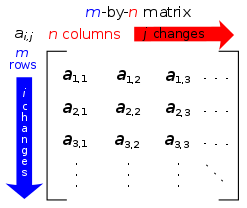

After we construct the matrix, we can find all possible matches between letters regardless their final arrangement*. It is, of course, unlikely that all possible matches will eventually occur. However, depending on the arrangement of these 2 strings, some matches between letters should occur. We are seeking for the best arrangement so that the matches are the maximum possible. We can 'mark' the positions where these matches occur in the matrix. How? We can

1) Insert diagonal lines (or value 1) in the locations where a match occures in the matrix. See the figure below.
This is in fact done by Diagonals(), whereby each match between strings 'v' and 'w' is marked by adding a value of 1 (instead of 0) to the locations where it is observed.

2) Deem every location in the matrix as a node and every diagonal line as a weighted edge of 1.

3) Find the largest (in terms of weight) path from source to sink. The more the weight, the more the matches between the strings. Hence, we need to use as many diagonal edges as possible before we end to the sink.

4) To find this path, we'll have to range through each row and then, going from left to right nodes, assign the nodes the maximum value they can take. The value of each node is depended solely on values of nodes that are ALREADY assessed. A node can take a value from the node on its left, the node above it or the diagonal node above and left from it. These three nodes are called predecessors and the value that will be finally assigned to the node of interest will be the highest one. Note that the diagonal edge's weight (1) is further added to the value of the diagonal predecessor-if this value is finally going to be passed on the node of interest. Also note that a diagonal predecessor might not have a weight of 1 if no match exists at this location.   

The aforementioned processes are described in more detail below. (see From sink to source : Trace back symbolic pathways (from i,j to 0,0) and find the maximum DNA bases matches between two sequences after deletions & insertions)

*referring to the arrangement following indels. 



# Steps 1 & 2  

In [2]:
import numpy as np

In [11]:
def Diagonals(v,w):
    """ Input 1: string corresponding to a sequence
        Input 2: string corresponding to another sequence
        Output : numpy 2d array
        
        In a matrix v*w, assign a value of 1 at all nodes where a match between identical string characters is observed
        When string character between v and w do not match, assign a value of 0"""
    
    N_cols = len(v)
    N_rows = len(w)
    diagonals = np.reshape (np.empty(N_cols * N_rows), (N_rows,N_cols))

    
    for v_ind in range(N_cols) :
        for w_ind in range(N_rows):
            if v[v_ind] == w[w_ind] :
                diagonals[:, v_ind][w_ind] = 1
            else:
                diagonals[:, v_ind][w_ind] = 0
                
    return diagonals
                
 

Conceptualizing diagonal lines (matching points)

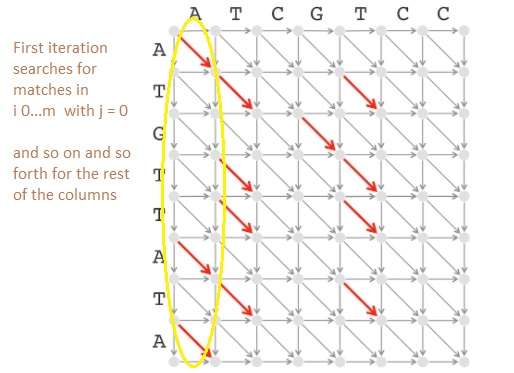

#### From sink to source : Trace back symbolic pathways (from i,j to 0,0) and find the maximum DNA bases matches between two sequences after deletions & insertions

As a symbolic pathway, I define any pathway in this matrix that is indicated by symbols (arrows) and connects the source to the sink

Steps to create a symbolic path for strings v (ATCGTCC) and w (ATGTTATA) :

    α) Make a matrix with two strings (see picture above). Based on this matrix, make another matrix with ALL possible matches of characters of v and w (see output of Diagonals()). The matches are represented as red diagonal edges in the picture above. Note that the output of Diagonals() contains 1s instead of red diagonal edges and 0s for the remaining nodes that dont receive a red edge. 
       
    β) A value of 1 means that in location i,j there is a match of characters for string v and string w. In other words, v[j] == w[i]. Therefore, if i=5 and j = 0 and the node in i,j matrix is 1(instead of 0) then ATCGTCC[0] == ATGTTATA[5], that is A=A. This can also be visualized with insertions and deletions :
    
                                            -  -  -  -  -  A        ( v = ATCGTCC )
                                            A  T  G  T  T  A        ( w= ATGTTATA )

Therefore, if we started going directly down in the matrix (without moving horizontal at all) for the 5 first steps, then we would have 'used' already 5 letters for w string and 0 for v. Then, had we taken a diagonal step, we would have used 6 letters for w and one for v. This is a red diagonal edge, meaning that the 6th letter of w overlaps with the 1rst letter of v.

Note that this is not the optimal path. It is merely used for the conceptualization of the approach of the solution.

Afterwards, we iterate through every row of the matrix and assign the maximum value for each node.
Let's say that we iterate through i=1 (with indexing 0,that is 2nd row for i=1).
We will sequentially find the maximum values for | 1,1 | 1,2 | 1,3 | 1,4 | etc.
The value that | 1,1 | can take will be one of the three:

    1) Value of 0,1     (that is the node above it)
    2) Value of 1,0     (that is the node left from it)
    3) Value of 0,0 + 1 (that is, the diagonal edge up and left +1)
  
  Out of these three possible values, we select the larger one (option 3).
  
  The picture below indicates where a node takes its value from. Note that in this example none of the nodes takes its value
  from the node above it, although this is also possible. 

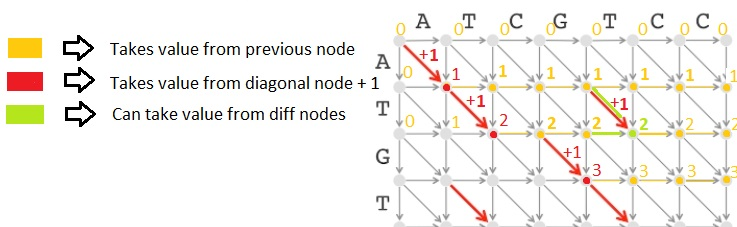

While we are iterating through the rows of the matrix, we can also assign a symbol to each node, indicating where it took its value from. 
For clarity, instead of assigning a symbol next to a maximum value of each node, a second matrix is created instead. The nodes of this second matrix contain solely one of the three symbols (→↓↘) indicating where this node took its value (which is unknown in this second matrix) from. 

# Step 3 & 4

In [12]:
def LongestPath (matrix):
    """Input : numpy 2d array with ones and zeros
       Output: numpy 2d array with symbols →↓↘. This is a 2d matrix with symbols indicating where each node took its value from """
    

    N_rows = len(matrix[0:,0]) + 1
    N_cols = len(matrix[0]) +1                                           
    nods_nums =  np.reshape (np.empty(N_rows*N_cols), (N_rows,N_cols))
    nods_nums[0,0] = 0                                                   #keeps the final values of each node as we range over rows
    symb_mtrx = [[] for row in range(N_rows-1)]                          #keeps a symbol that indicates where this value was taken from
        
    for r_index in range(1,N_cols):
        nods_nums[0,r_index] = 0
                                                                            
    for d_index in range(1,N_rows):
        nods_nums[d_index,0] = 0
        
    column_seek =0
    for i in range(1,N_rows):
        for j in range (1,N_cols):
            candidate_indegrees = [nods_nums [i,j-1], nods_nums [i-1,j], matrix[i-1][j-1] + nods_nums [i-1][j-1]]
            indegree = max (candidate_indegrees)
            nods_nums[i,j] = indegree
            if indegree == candidate_indegrees[0]:
                symb_mtrx[i-1].append('→')
            elif indegree == candidate_indegrees[1]:
                symb_mtrx[i-1].append('↓')
            else:
                symb_mtrx[i-1].append('↘')
           
    symb_mtrx.insert(0,list('→'*(N_cols-1)))  #insert a row with right edges on top
    for row in symb_mtrx:                     #insert a column with down edges on left 
        row.insert(0,'↓')
    symb_mtrx[0][0] = 'S'                     #mark source as S
    symb_mtrx = np.array(symb_mtrx)
    
    return symb_mtrx

After the matrix is created, we can trace back the lines from sink to source, thereby reaching from i,j to 0,0. A path that connects the sink with the source is also (one of) the longest* possible path(s). This holds true, at least given the current topological setting.  

We can pass ( sympath,len(w),len(v) ) as arguments for the TraceBackPath().
And then slice the path like this[1:], to get rid of the S at the start of the string.

*By longest, it is implied that the sink's (i,j) value it the largest possible.

In [13]:
def TraceBackPath (sympath,i,j):
    """Input :numpy 2d array with symbols →↓↘. This is a 2d matrix with symbols indicating where each node took its value from
              This is the output of LongestPath
       Output: string starting with S and followed by one of the three symbols.
       
       Note that the symbolic path starts from source and ends at sink. Although tracing is backwards, path has the reverse
       direction"""
  
    curr_symb = sympath[i][j] 
    
    if curr_symb == "S":
        return "S"
    
    if curr_symb == '→':
        return TraceBackPath(sympath,i,j-1) + curr_symb
    if curr_symb == '↓':
        return TraceBackPath(sympath,i-1,j) + curr_symb
    if curr_symb == '↘':
        return TraceBackPath(sympath, i-1,j-1) + curr_symb
        

Once a symbolic path that connects the source to the sink is known, it can be used to decipher the v and w sequences after indels (insertions and deletions). For this, we can prepare two generators which will yield one character of v or w string every time we call them. Then, we can make a DecipherPaths() function.

In [14]:
def gen(string):
    """Input : string corresponding to a sequence
       Yield : string corresponding to a character"""

    for letter in string:
        yield letter

In [15]:
def DecipherPaths(path,w,v):
    """Input 1: string (without S at start) containing a long sequence derived from three unique symbols (→↓↘)
                This is the output of TraceBackPath (except for the removed S at start)
       Input 2: string corresponding to a sequence (vertical string on matrix)
       Input 3: string corresponding to a sequence (horizontal string on matrix)
       Output : tuple with two strings that might contain '-' characters that correspond to insertions and deletions
       
       Everytime we come accros a ↓ edge, it means that we stop ranging through horizontal string v, yet we keep ranging for
       vertical w. Thus we add '-' to v and the next character for w. By the same rationale, we act accordingly for the rest
       two symbols"""
    
    deciphered_v_path=''
    deciphered_w_path =''
    gen_w = gen(w)
    gen_v = gen(v)

    for symbol in path :
        if symbol == '↓':
            deciphered_v_path += '-'
            deciphered_w_path += next(gen_w)
        if symbol == '→':
            deciphered_v_path += next(gen_v)
            deciphered_w_path += '-'
        if symbol =='↘':
            deciphered_v_path += next(gen_v)
            deciphered_w_path += next(gen_w)
            
    return (deciphered_w_path,deciphered_v_path)

Lastly, we can simpy iterate through the length of the deciphered paths, which now have the same length, and see where they match.

In [18]:
# Example :

# v = 'ATCGTCC'
# w = 'ATGTTATA'

# diagonals = Diagonals(v,w)
# longestpath = LongestPath(diagonals)
# path = TraceBackPath(longestpath,len(w),len(v))
# path = path[1:]

# deciphered_w_path,deciphered_v_path = DecipherPaths(path,w,v)

# final_matches = ''

# for i in range(len(deciphered_v_path)):
#     if deciphered_v_path[i] == deciphered_w_path[i]:
#         final_matches += deciphered_v_path[i]

# final_matches

### Find the longest path in a topologically ordered directed graph.



A topologically ordered directed graph with a starting node on the left and an end node on the right can only contain edges which project to nodes on the right. Adjacent nodes do not have to be connected. However, a node can never broadcast an output to a node on the left compared to its position.

Example:

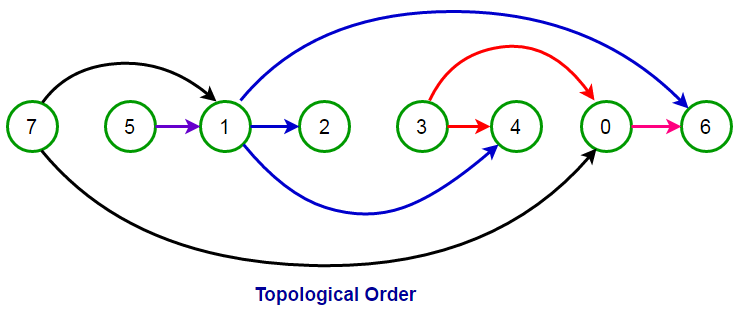

In topologically ordered graphs it is easy to find the longest weighted path. We just need to range through the nodes -from left to right in this example- and assign the largest possible value to them. Since all inputs can only be derived from already assessed nodes, it is guaranteed that the following node will be assigned the maximum possible value.

In order to assign a maximum value to a node we need to know three things:

    1) The nodes that broadcast outputs to this node
    2) The maximum value of each one of these nodes
    3) The weight of each node's edge.

We calculate the sum of ( the value of each node + its edge's weight ) for each node that projects to the node of interest.
Finally, we assign the highest sum as a value to our node of interest.

In [ ]:
def LongestPathTopologicallyOrdered (OutInDic,trim_seq,start_node):
    """Input1: Dict with int as key and list with tuples with int as value. I.e  17: [(13, 6), (9, 1)]
               Keys correspond to nodes that receive input. First element of tuple corresponds to the node from which the 
               key receives its input and second element correspond to the weight of this input(edge). For instance, 17 receives
               weighted input of 6 by node 13 and weighted input of 1 by node 9
       Input2: List with all nodes that constitute extensions of the source, that is, nodes that can trace us back to the source.
               The nodes have to be in topological order. This means that all edges must project to a node on the right (a node
               with larger index). Adjacent nodes do not have to be connected necessarily, yet all edges must be directed to 
               larger nodes. Note that the starting node itself is not included. It is passed as a different parameter.
       
       Input3: int corresponding to starting node of a topologicall ordered graph
       
       Output: Tuple of this form ([int1,int2,int3...], int). The first element (list) corresponds to the longest path in the
               topologically ordered graph whereas the second corresponds to the sum of weights of this path.
               
               
               """
    largest_input = {}                            # key: name of a node. Value: name of another node (that with highest input to key)
    max_dist = dict.fromkeys(trim_seq,[])         #dict with empty lists as values for all topologically ordered nodes
    max_dist[start_node]=0                        #max distance will assign to each key the max input+weight value of all input nodes
    end_node=trim_seq[-1]                          
        
    for node in trim_seq:                                                  #node the inputs of which will be assessed
        scores = []                                                        # temp stores all sums of input node+weight to node
        inputs=[]                                                          # temp stores the respective input node's value 
        for weighted_input in OutInDic[node]:                              #for every input with a weight
            scores.append(max_dist[weighted_input[0]]+weighted_input[1])   #add the input's value and its weight to the node    
            inputs.append(weighted_input[0])                               #add in another list the input to this node
        max_dist[node] = max(scores)                                       #eventually, assign the largest input_value + weight
        largest_input[node] = inputs[scores.index(max_dist[node])]         ## to the node as long as the name(int)of this input
                                                                           ### don't confuse the name of the input with its value
    largest_path = [end_node]                                              # initiate the largest path starting by its end
    curr_key = end_node                                                    # start tracing back to the source from end node

    while True:
        prev_node = largest_input.get(curr_key)                            # prev_node is the node with the largest input to curr key
        largest_path.append(prev_node)                                     ## largest_input does not include values. Only names.
        curr_key = prev_node                                               # node with largest input will be called in next iteration
        if curr_key == start_node:                                         # start node = end of path
            break
     
    largest_path = largest_path[::-1]                           
    
    return (largest_path,max_dist[end_node])
            